In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint

In [2]:
from sympy import *
import sympy

In [3]:
a, b, c, t, k1, k2, k_dec, t_1, t_2, a0, b0= symbols('A, B, C, t, k_1, k_2, k_dec t_1 t_2, a0, b0', real=True)

a=Function('A')
b=Function('B')
c=Function('C')


eq1=Eq(diff(a(t), t), -k1*a(t)-k_dec*a(t))
eq2=Eq(diff(b(t), t), k1*a(t)-k2*b(t)-k_dec*b(t))
eq3=Eq(diff(c(t), t), k2*b(t)-k_dec*c(t))

In [4]:
sols=sympy.solvers.ode.systems.dsolve_system([eq1,eq2,eq3], ics={a(0):a0, b(0):0, c(0):0})[0]

In [5]:
sols[1].simplify()

Eq(B(t), a0*k_1*(exp(t*(k_1 + k_dec)) - exp(t*(k_2 + k_dec)))*exp(-t*(k_1 + k_2 + 2*k_dec))/(k_1 - k_2))

In [6]:
time_max=solve(Eq(diff(sols[1].rhs, t), 0), t)[0]
time_max

log((k_1 + k_dec)/(k_2 + k_dec))/(k_1 - k_2)

In [7]:
sols[1].rhs/(sols[1].subs(t, time_max).rhs).simplify()

(k_1 - k_2)*(a0*k_1*exp(-t*(k_2 + k_dec))/(k_1 - k_2) - a0*k_1*exp(-t*(k_1 + k_dec))/(k_1 - k_2))*exp((k_1 + k_2 + 2*k_dec)*log((k_1 + k_dec)/(k_2 + k_dec))/(k_1 - k_2))/(a0*k_1*(exp((k_1 + k_dec)*log((k_1 + k_dec)/(k_2 + k_dec))/(k_1 - k_2)) - exp((k_2 + k_dec)*log((k_1 + k_dec)/(k_2 + k_dec))/(k_1 - k_2))))

In [8]:
sols[1].subs(k1,1).subs(k2,2)

ka1=0.5
ka2=0.01000
decay=0.001

/Users/cesare/anaconda3/lib/python3.11/site-packages/sympy/plotting/experimental_lambdify.py:188: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  return self.__call__(args)


TypeError: Cannot convert expression to float

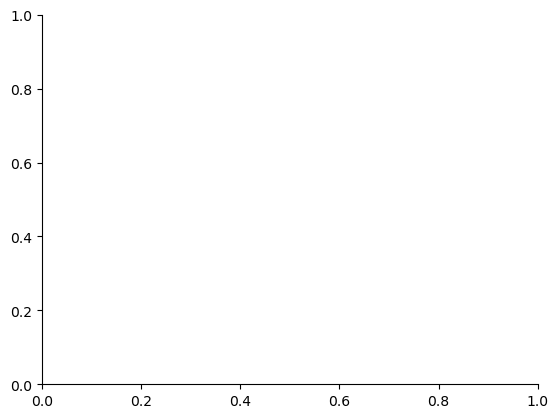

In [9]:
plot((sols[1].rhs.subs(k1,ka1).subs(k2,ka2).subs(k_dec,decay), (t,0,100)) ,(sols[0].rhs.subs(k1,ka1).subs(k2,ka2).subs(k_dec,decay), (t,0,100)), (sols[2].rhs.subs(k1,ka1).subs(k2,ka2).subs(k_dec,decay), (t,0,100)) )


In [ ]:
solve(Eq(diff(sols[1].rhs, t), 0), t)[0].subs(k1, ka1).subs(k2, ka2).subs(k_dec, decay)

In [ ]:
s1=integrate(sols[1].rhs, (t,t_1,t_2),conds='separate')

In [ ]:
s1.subs(t_2,10).subs(t_1, 0)

In [ ]:
plot(s1.subs(k1, ka1).subs(k2, ka2).subs(k_dec, decay), (j, 0,100))

In [ ]:
s1.simplify()

In [10]:
lambdify()

TypeError: lambdify() missing 2 required positional arguments: 'args' and 'expr'

In [11]:
np.arange(0., 1000., 1., dtype=float)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [12]:
sols[1].rhs

a0*k_1*exp(-t*(k_2 + k_dec))/(k_1 - k_2) - a0*k_1*exp(-t*(k_1 + k_dec))/(k_1 - k_2)

In [13]:
def batemann_decayed(t,a0, k1, k2, k_dec):
    import numpy as np
    y= (a0*k1*np.exp(-t*(k2+k_dec)))/(k1-k2) - (a0*k1*np.exp(-t*(k1+k_dec)))/(k1-k2)
    return y

In [14]:
a, b, c, t, k1, k2, k_dec, t_1, t_2, a0, b0, idg= symbols('A, B, C, t, k_1, k_2, k_dec t_1 t_2, a0, b0, idg', real=True)

a=Function('A')
b=Function('B')
c=Function('C')


eq1=Eq(diff(a(t), t), -k1*a(t))
eq2=Eq(diff(b(t), t), k1*a(t)-k2*b(t))
eq3=Eq(diff(c(t), t), k2*b(t))

In [15]:
sols=sympy.solvers.ode.systems.dsolve_system([eq1,eq2,eq3], ics={a(0):1, b(0):0, c(0):0})[0]

In [49]:
sols[1].simplify()

Eq(B(t), k_1*exp(-k_2*t)/(k_1 - k_2) - k_1*exp(-k_1*t)/(k_1 - k_2))

In [50]:
t_max=solve(Eq(diff(sols[1].rhs, t), 0), t)[0]

In [51]:
b_max=sols[1].rhs.subs(t, t_max).simplify()

In [52]:
j=(sols[1].rhs/b_max).simplify()*idg*exp(-t*k_dec)

f=lambdify([t, k1, k2, k_dec, idg],j )
f(0.01, 2, 3,4, 100)

6.325231732852897

In [26]:
import matplotlib.pyplot as plt

In [54]:


def function_d(t, k_1 , k_2, k_dec, idg):
    y=idg*(-np.exp(k_1*t) + np.exp(k_2*t))*np.exp(-k_dec*t)*np.exp(-t*(k_1 + k_2))/(np.exp(k_1*np.log(k_2/k_1)/(k_1 - k_2)) - np.exp(k_2*np.log(k_2/k_1)/(k_1 - k_2)))
    return y

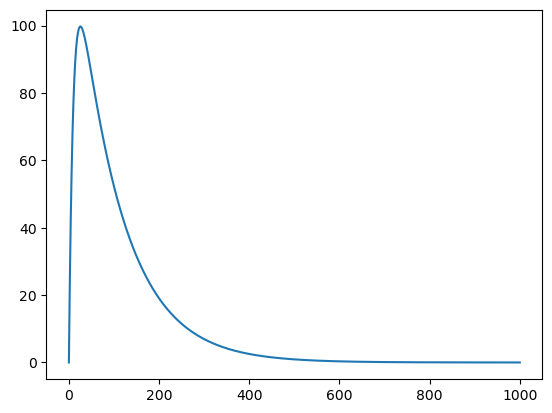

In [55]:
x=[]
y=[]
for i in np.linspace(0, 1000, 1000):
    x.append(i)
    y.append(function_d(i, 0.1, 0.01, 0.0001, 100))

plt.plot(x, y)

In [56]:
s=sols[1].rhs/solve(Eq(diff(sols[1].rhs,t), 0), t)[0].simplify()*idg*exp(-t*k_dec).expand()
s

-idg*(k_1 - k_2)*(k_1*exp(-k_2*t)/(k_1 - k_2) - k_1*exp(-k_1*t)/(k_1 - k_2))*exp(-k_dec*t)/log(k_2/k_1)

In [47]:
s.simplify() 

-idg*k_1*(exp(k_1*t) - exp(k_2*t))*exp(-t*(k_1 + k_2 + k_dec))/log(k_2/k_1)

In [195]:
def aaa(t, k1, k2, k_dec, idg):
    j=((k2-k1)*( (k1*np.exp(-k2*t))/(k1-k2) - (k1*np.exp(-k1*t))/(k1-k2)  ) * np.exp(-k_dec*t))/(np.log(k2/k1))
    return j

In [196]:
idga=1000
k1=0.01
k2=0.0005
k_dec=0.00000001

slph=[]
saf=[]
for i in np.linspace(0,1000,1000):
    slph.append(aaa(i, k1, k2, k_dec, idga))
    saf.append(i)

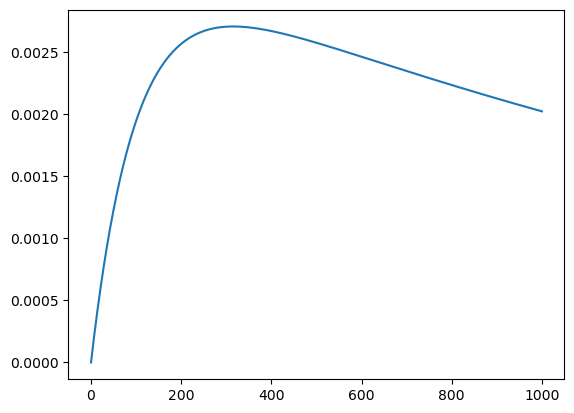

In [197]:
plt.plot(saf, slph)

In [57]:
def batemann(t,a0, k1, k2):
    import numpy as np
    y= (a0*k1*np.exp(-t*(k2)))/(k1-k2) - (a0*k1*np.exp(-t*(k1)))/(k1-k2)
    return y

In [73]:
j=[]
t=[]
for i in np.linspace(0,1000, 50):
    j.append(batemann_decayed(i, 1, 0.01, 0.001, 0.001))
    t.append(i)

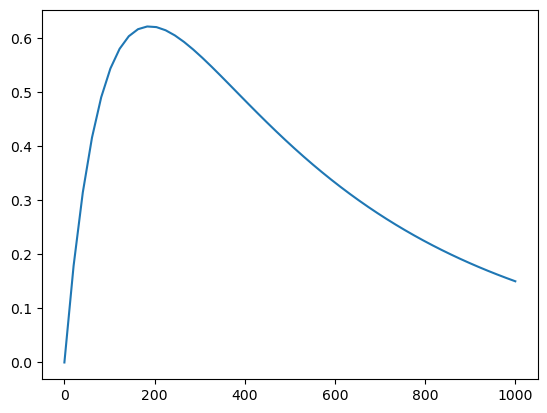

In [74]:
import matplotlib.pyplot as plt
plt.plot(t, j)

In [81]:
eq2

Eq(Derivative(B(t), t), k_1*A(t) - k_2*B(t))

In [82]:
diff(sols[1], t)

ValueError: too many values to unpack (expected 2)

In [83]:
Eq(diff(sols[1].rhs, t), 0), t)

SyntaxError: unmatched ')' (4211637159.py, line 1)

In [57]:
df

NameError: name 'df' is not defined

In [ ]:
np.trapz()